In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
# plt.style.use("ggplot")

%matplotlib inline

In [29]:
def plot_all(model, x1, y1, x2, y2, rate):
    x   = np.linspace(-10, 70, 200)[:, None] * rate
    y   = np.linspace(-10, 70, 200)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()

    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    d = np.where(abs(mm2.T[0]) < 0.1)
    e = xx.T[0][d]
    f = yy.T[0][d]

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)


    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

#     xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

    x2_ = np.concatenate([np.ones(N2)*15, np.linspace(15, 20, N2//2), np.ones(N2)*20, np.linspace(20, 40, N2), np.ones(N2)*40, np.linspace(40, 45, N2//2), np.ones(N2)*45, np.linspace(45, 15, N2)]) * rate
    y2_ = np.concatenate([np.linspace(15, 45, N2), np.ones(N2//2)*45, np.linspace(45, 30, N2), np.ones(N2)*30, np.linspace(30, 45, N2), np.ones(N2//2)*45, np.linspace(45, 15, N2), np.ones(N2)*15]) * rate
    
    plt.plot(x2_, y2_, linewidth=5, c='black')
    
    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)
#     plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5, c='red')
#     plt.plot(x2_0, y2_0, linewidth=5, c='blue')
    plt.scatter(e,f, s=10, c='navy')
    # plt.scatter(e,f)
    #     plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)
    plt.plot(x2_, y2_, linewidth=5, c='black')
    plt.show() 
    
    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)
    plt.scatter(e,f, s=10, c='navy')
    plt.show()
    
    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

In [3]:
N1 = 10
N2 = 10
rate = 0.01 # data scale

In [4]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) ) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) ) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1)*10, np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) ) * rate
y1_1 = (np.concatenate([np.ones(N1)*8, np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) ) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [6]:
step=4
x2_0 = np.concatenate([np.ones(N2)*15, np.linspace(15, 20, N2//2), np.ones(N2)*20, np.linspace(20, 40, N2), np.ones(N2)*40, np.linspace(40, 45, N2//2), np.ones(N2)*45, np.linspace(45, 15, N2)]) * rate
x2_1 = np.concatenate([np.ones(N2)*13, np.linspace(13, 22, N2//2), np.ones(N2)*22, np.linspace(22, 38, N2), np.ones(N2)*38, np.linspace(38, 47, N2//2), np.ones(N2)*47, np.linspace(47, 13, N2)]) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = np.concatenate([np.linspace(15, 45, N2), np.ones(N2//2)*45, np.linspace(45, 30, N2), np.ones(N2)*30, np.linspace(30, 45, N2), np.ones(N2//2)*45, np.linspace(45, 15, N2), np.ones(N2)*15]) * rate
y2_1 = np.concatenate([np.linspace(13, 47, N2), np.ones(N2//2)*47, np.linspace(47, 32, N2), np.ones(N2)*32, np.linspace(32, 47, N2), np.ones(N2//2)*47, np.linspace(47, 13, N2), np.ones(N2)*13]) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

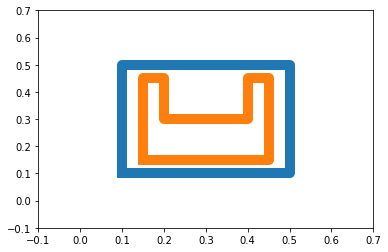

In [7]:
plt.plot(x1_0, y1_0, linewidth=10)
plt.plot(x2_0, y2_0, linewidth=10)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

# STEP1

In [8]:
# step = 3

# x1_0 = (np.concatenate([np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) + np.random.randn(N1*step) * 0.2) * rate
# x1_1 = (np.concatenate([np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) + np.random.randn(N1*step) * 0.2) * rate
# x1    = np.concatenate([x1_0, x1_1])[:, None]

# y1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) + np.random.randn(N1*step) * 0.2) * rate
# y1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) + np.random.randn(N1*step) * 0.2) * rate
# y1    = np.concatenate([y1_0, y1_1])[:, None]

# X1 = np.concatenate([x1,y1],1)
# Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
# T1 = 0

In [9]:
x2_0 = np.concatenate([np.linspace(45, 40, N2//2)]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.linspace(47, 38, N2//2)]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]


y2_0 = np.concatenate([np.ones(N2//2)*45]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.ones(N2//2)*47]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1
# print(X2.shape)
# print(Y2.shape)

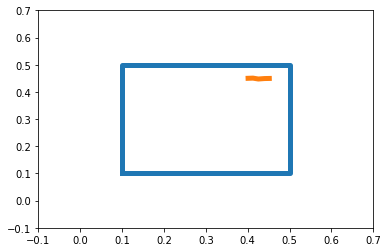

In [10]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [11]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
-------------------------------------
560.340087890625
-------------------------------------
312.2266845703125
-------------------------------------
244.43272399902344
-------------------------------------
193.69593811035156
-------------------------------------
150.713623046875
-------------------------------------
113.82770538330078
-------------------------------------
82.48223876953125
-------------------------------------
56.32154083251953
-------------------------------------
34.988800048828125
-------------------------------------
17.977956771850586
-------------------------------------
4.621524810791016
-------------------------------------
-5.801334381103516
-------------------------------------
-13.951622009277344
-------------------------------------
-20.369873046875
-------------------------------------
-25.470687866210938
-------------------------------------
-29.563034057617188
--------------

-------------------------------------
-63.47673034667969
-------------------------------------
-63.52177429199219
-------------------------------------
-63.5662841796875
-------------------------------------
-63.612091064453125
-------------------------------------
-63.656951904296875
-------------------------------------
-63.7139892578125
-------------------------------------
-63.7645263671875
-------------------------------------
-63.828094482421875
-------------------------------------
-63.89031219482422
-------------------------------------
-63.96165466308594
-------------------------------------
-64.03269958496094
-------------------------------------
-64.10942077636719
-------------------------------------
-64.19223022460938
-------------------------------------
-64.28385925292969
-------------------------------------
-64.37396240234375
-------------------------------------
-64.47217559814453
-------------------------------------
-64.57478332519531
-------------------------------

In [12]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[1.0147898, 0.7965619],
       [0.7965619, 1.       ]], dtype=float32)

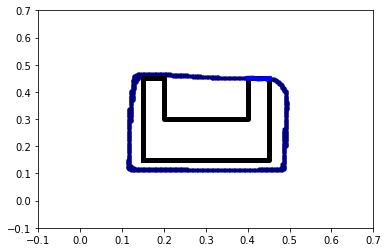

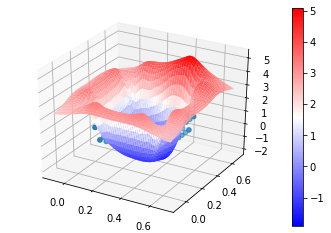

In [14]:
# colormap = plt.cm.RdBu
# sns.heatmap(res, linewidths=0.2, 
#         square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP2

In [15]:
x2_0 = np.concatenate([np.linspace(45, 40, N2//2), np.ones(N2)*40, np.linspace(40, 20, N2)]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.linspace(47, 38, N2//2), np.ones(N2)*38, np.linspace(38, 22, N2)]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]


y2_0 = np.concatenate([np.ones(N2//2)*45, np.linspace(45, 30, N2), np.ones(N2)*30]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.ones(N2//2)*47, np.linspace(47, 32, N2), np.ones(N2)*32]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1

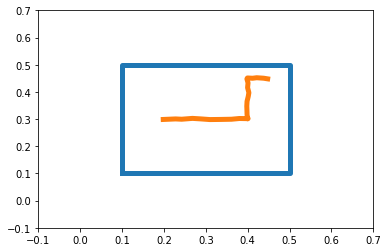

In [16]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x1_1, y1_1)

# plt.scatter(x2_0, y2_0)
# plt.scatter(x2_1, y2_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [18]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
-------------------------------------
862.8036499023438
-------------------------------------
463.557861328125
-------------------------------------
341.9165344238281
-------------------------------------
250.24600219726562
-------------------------------------
176.26324462890625
-------------------------------------
118.21403503417969
-------------------------------------
73.5439682006836
-------------------------------------
38.99359130859375
-------------------------------------
12.051133155822754
-------------------------------------
-9.061178207397461
-------------------------------------
-25.66901397705078
-------------------------------------
-38.80479431152344
-------------------------------------
-49.27093505859375
-------------------------------------
-57.68104553222656
-------------------------------------
-64.49637603759766
-------------------------------------
-70.0657958984375
---------------

-------------------------------------
-114.54916381835938
-------------------------------------
-114.61070251464844
-------------------------------------
-114.66493225097656
-------------------------------------
-114.72395324707031
-------------------------------------
-114.77928924560547
-------------------------------------
-114.831787109375
-------------------------------------
-114.8883056640625
-------------------------------------
-114.94160461425781
-------------------------------------
-114.99114990234375
-------------------------------------
-115.0521240234375
-------------------------------------
-115.10018157958984
-------------------------------------
-115.15667724609375
-------------------------------------
-115.19993591308594
-------------------------------------
-115.253662109375
-------------------------------------
-115.30841064453125
-------------------------------------
-115.35575103759766
-------------------------------------
-115.40242767333984
--------------------

In [19]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.5794164 , 0.57324964],
       [0.57324964, 1.        ]], dtype=float32)

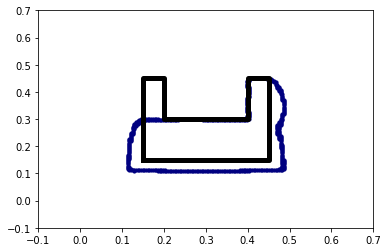

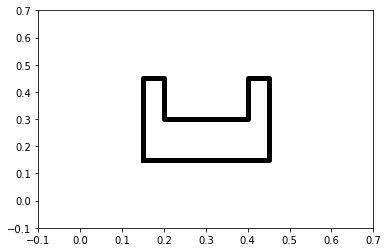

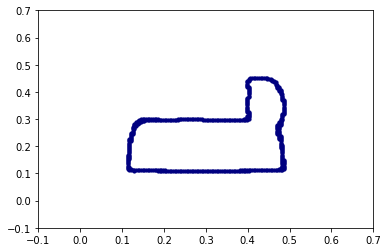

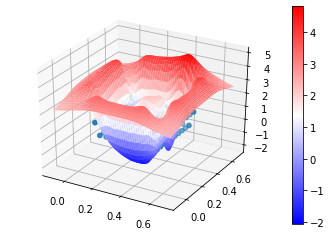

In [30]:
# colormap = plt.cm.RdBu
# sns.heatmap(res, linewidths=0.2, 
#         square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP3

In [ ]:
x2_0 = np.concatenate([np.linspace(45, 40, N2//2), np.ones(N2)*40, np.linspace(40, 20, N2), np.ones(N2)*20, np.linspace(20, 15, N2//2)]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.linspace(47, 38, N2//2), np.ones(N2)*38, np.linspace(38, 22, N2), np.ones(N2)*22, np.linspace(22, 13, N2//2)]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]


y2_0 = np.concatenate([np.ones(N2//2)*45, np.linspace(45, 30, N2), np.ones(N2)*30, np.linspace(30, 45, N2), np.ones(N2//2)*45]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.ones(N2//2)*47, np.linspace(47, 32, N2), np.ones(N2)*32, np.linspace(32, 47, N2), np.ones(N2//2)*47]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1

In [ ]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x1_1, y1_1)

# plt.scatter(x2_0, y2_0)
# plt.scatter(x2_1, y2_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [ ]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

In [ ]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

In [ ]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP4

In [286]:
x2_0 = np.concatenate([np.linspace(45, 40, N2//2), np.ones(N2)*40, np.linspace(40, 20, N2), np.ones(N2)*20, np.linspace(20, 15, N2//2), np.ones(N2)*15, np.linspace(15, 45, N2), np.ones(N2)*45]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.linspace(47, 38, N2//2), np.ones(N2)*38, np.linspace(38, 22, N2), np.ones(N2)*22, np.linspace(22, 13, N2//2), np.ones(N2)*13, np.linspace(13, 47, N2), np.ones(N2)*47]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]


y2_0 = np.concatenate([np.ones(N2//2)*45, np.linspace(45, 30, N2), np.ones(N2)*30, np.linspace(30, 45, N2), np.ones(N2//2)*45, np.linspace(45, 15, N2), np.ones(N2)*15, np.linspace(15, 45, N2)]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.ones(N2//2)*47, np.linspace(47, 32, N2), np.ones(N2)*32, np.linspace(32, 47, N2), np.ones(N2//2)*47, np.linspace(47, 13, N2), np.ones(N2)*13, np.linspace(13, 47, N2)]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1

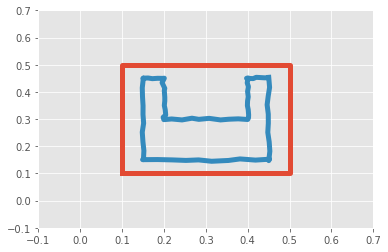

In [287]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x1_1, y1_1)

# plt.scatter(x2_0, y2_0)
# plt.scatter(x2_1, y2_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [288]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.2829, 1.8683],
        [1.8683, 2.9812]])
sigma: tensor(-3.7851)
kernel: tensor([0.1319])
----- after learning -----
tensor([[1.2829, 1.8683],
        [1.8683, 2.9812]])


In [289]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.43031564, 0.6267106 ],
       [0.6267106 , 1.        ]], dtype=float32)

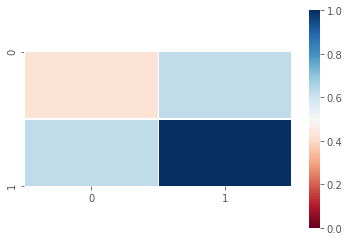

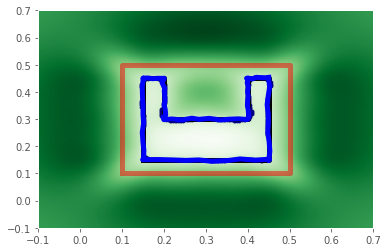

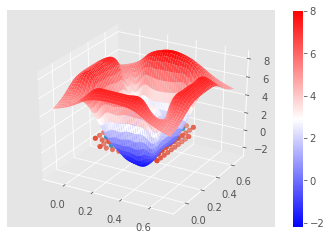

In [290]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)